In [13]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 16.3 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 362 kB 7.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# 1. Import all necessary libraries at the beginning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2. Data Preparation: Load and clean the US Superstore Excel data

In [ ]:
df = pd.read_excel('US Superstore data.xls')

# Initial exploration

In [ ]:
print("DataFrame shape (rows, columns):", df.shape)
print(df.info())
print(df.head())

DataFrame shape (rows, columns): (9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null

In [4]:
if 'Row ID' in df.columns:
    df.drop('Row ID', axis=1, inplace=True)

In [6]:
critical_columns = ["Order Date", "Sales", "Profit", "Discount", "Product Name"]
df.dropna(subset=critical_columns, inplace=True)

In [7]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
if "Ship Date" in df.columns:
    df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# d. Remove duplicate rows

In [ ]:
df = df.drop_duplicates()

In [9]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [10]:
df['Year'] = df['Order Date'].dt.year

In [42]:
import pip

# A. Interactive Line Chart: Sales Trends Over the Years

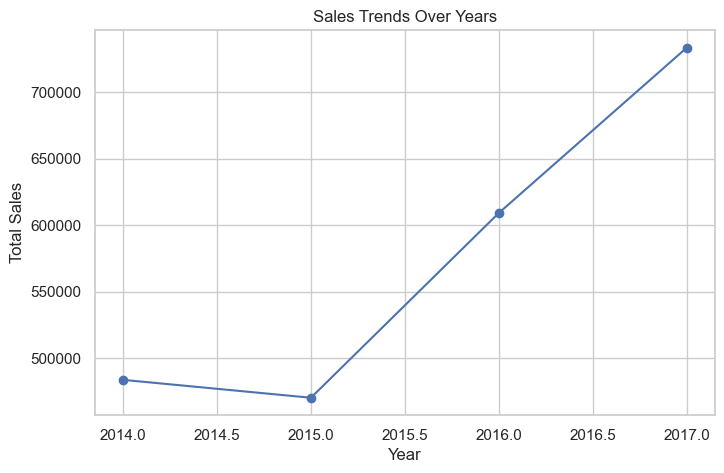

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()
plt.figure(figsize=(8,5))
plt.plot(sales_by_year['Year'], sales_by_year['Sales'], marker='o')
plt.title("Sales Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()
# Insight: Reveals sales growth or decline patterns over the years
# B. Interactive Map: Sales Distribution by Country (using Plotly)
sales_by_country = df.groupby("Country")["Sales"].sum().reset_index()
fig = px.choropleth(
    sales_by_country,
    locations="Country",
    locationmode="country names",
    color="Sales",
    title="Global Sales Distribution"
)
fig.show()


In [ ]:
#  Insight: Highlights top-performing countries and regional sales disparities..

# Shows annual sales figures over multiple years, allowing easy comparison of sales performance and identification of long-term trends.

/var/folders/xh/330hhznn65g8ndgfy8rh7gkw0000gn/T/ipykernel_77526/595609483.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




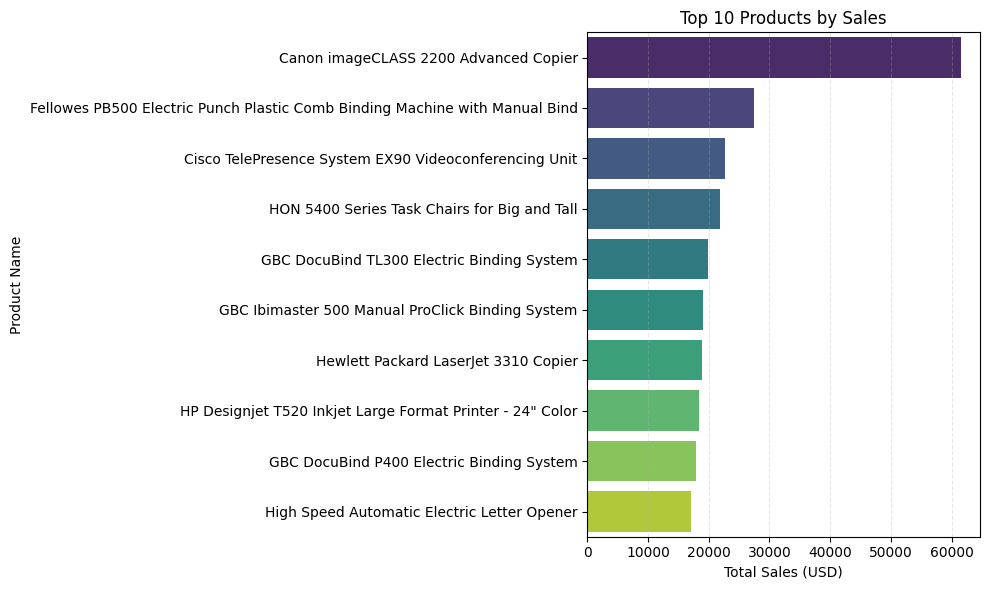

In [17]:
# A. Bar Chart: Top 10 Products by Sales
top10 = (
    df.groupby("Product Name")["Sales"]
      .sum()
      .nlargest(10)
      .reset_index()
)
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x="Sales", y="Product Name", palette="viridis")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.show()
# Insight: Quickly identifies the products driving the most revenue.

# Bar Plot: Displays the ten products with the highest total sales, helping identify best-sellers for inventory and marketing focus.

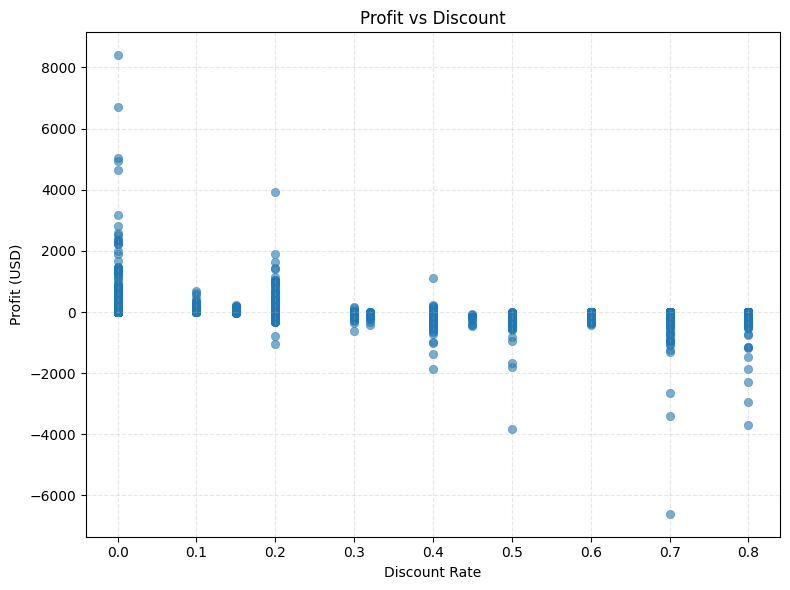

In [ ]:
# B. Scatter Plot: Profit vs Discount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.6, edgecolor=None)
plt.title("Profit vs Discount")
plt.xlabel("Discount Rate")
plt.ylabel("Profit (USD)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()
# Insight: Reveals the relationship between discount rates and profit# Scatter Plot: Shows the relationship between discount rates and profit for each transaction, illustrating how discounts may impact profitability..

# Scatter Plot: Shows the relationship between discount rates and profit for each transaction, illustrating how discounts may impact profitability.

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x="Sales", y="Product Name", palette="viridis")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

hb = plt.hexbin(
    df["Discount"], df["Profit"],
    gridsize=60,                  
    cmap='inferno',               
    linewidths=0.7,                
    edgecolors='grey',            
    mincnt=1,                     
    bins='log',                    
    alpha=0.95                     
)

cb = plt.colorbar(hb, label="Nombre de points (log)")
plt.title("Profit vs Discount — Hexbin publication-quality", fontsize=16, weight='bold')
plt.xlabel("Discount Rate", fontsize=14)
plt.ylabel("Profit (USD)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

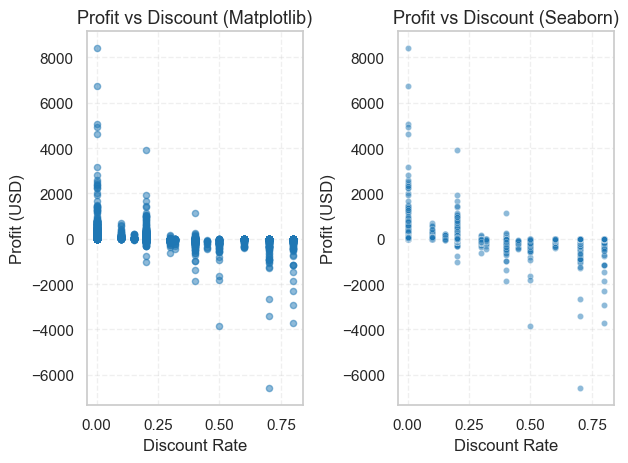

NameError: name 'S' is not defined

In [44]:
# --- Matplotlib subplot ---
plt.subplot(1, 2, 1)
plt.scatter(df["Discount"], df["Profit"], color="#1f77b4", alpha=0.5, s=20)
plt.title("Profit vs Discount (Matplotlib)", fontsize=13)
plt.xlabel("Discount Rate")
plt.ylabel("Profit (USD)")
plt.grid(True, linestyle="--", alpha=0.3)
# Comment: Matplotlib provides full control and flexibility, but requires more manual styling for an attractive result.

# --- Seaborn subplot ---
plt.subplot(1, 2, 2)
sns.scatterplot(x="Discount", y="Profit", data=df, color="#1f77b4", alpha=0.5, s=20)
plt.title("Profit vs Discount (Seaborn)", fontsize=13)
plt.xlabel("Discount Rate")
plt.ylabel("Profit (USD)")
plt.grid(True, linestyle="--", alpha=0.3)
# Comment: Seaborn offers a high-level interface with beautiful default styles, making it easier to create clear, professional plots with less code.

plt.tight_layout()
plt.show()
S


Matplotlib: Offers detailed customization but needs more code for a polished look. Good for full control over plot elements.
Seaborn: Delivers attractive, readable plots quickly with minimal code and built-in themes. Ideal for statistical exploration and presentation.
This visual comparison lets me directly observe the differences in style, code simplicity, and output between the two libraries for the same data and chart type.